In [32]:
# grid_search_sc.py

import os
import copy
from run_sweep import run_sweep
from ingestion import prepare_datasets
from fetch_and_visualize import get_top_runs, plot_hyperparameter_performance, compute_correlation, plot_train_val_curves
from sweep_config import sweep_config
from run_grid_search import run_grid_search

In [2]:
# Prepare datasets
base_dir = os.path.dirname(os.getcwd())
graphs_sc, labels_sc, graphs_sc_combined, labels_sc_combined, feature_names = prepare_datasets(base_dir)

In [19]:
# Create copies of the sweep config for each dataset
sweep_config_sc = copy.deepcopy(sweep_config)

# Update the sweep config with the in_channels
sweep_config_sc['parameters'].update({
    'in_channels': {
        'value': 6
    }
})

In [8]:
# Run the grid search for the first dataset
all_runs_df_sc, top_runs_df_sc = run_grid_search(graphs_sc, labels_sc, sweep_config_sc, 'graphs_sc', top_x= 10, sweep_count = 50)

Create sweep with ID: 5tx24pap
Sweep URL: https://wandb.ai/barbonigiorgia-sapienza-universit-di-roma/graph-classification-graphs_sc/sweeps/5tx24pap


wandb: Agent Starting Run: m067876f with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 5
wandb: 	num_heads: 2
wandb: 	optimizer: sgd
wandb: 	out_channels: 4
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.001, 'num_epochs': 5, 'num_heads': 2, 'optimizer': 'sgd', 'out_channels': 4, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_f1,▁▁▁▁▁
train_loss,▇█▁▃▄
val_accuracy,▁▁▁▁▁
val_f1,▁▁▁▁▁
val_loss,█▆▅▃▁
epoch,5
train_accuracy,0.568
train_f1,0.41151
train_loss,0.68396


wandb: Agent Starting Run: hszbmnab with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.1
wandb: 	num_epochs: 5
wandb: 	num_heads: 3
wandb: 	optimizer: adam
wandb: 	out_channels: 4
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.1, 'num_epochs': 5, 'num_heads': 3, 'optimizer': 'adam', 'out_channels': 4, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0}


epoch,▁▃▅▆█
train_accuracy,▁▅▇██
train_f1,▁▅▇██
train_loss,█▄▁▁▂
val_accuracy,▁▇█▇▇
val_f1,▁▇█▇▇
val_loss,█▄▁▁▂
epoch,5
train_accuracy,0.76
train_f1,0.75867
train_loss,0.5265


wandb: Agent Starting Run: qmgd8utm with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 5
wandb: 	num_heads: 1
wandb: 	optimizer: adam
wandb: 	out_channels: 12
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 5, 'num_heads': 1, 'optimizer': 'adam', 'out_channels': 12, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0}


epoch,▁▃▅▆█
train_accuracy,▁▄▅▇█
train_f1,▂▁▂▆█
train_loss,█▆▅▄▁
val_accuracy,▁▁█▆▆
val_f1,▁▁█▇█
val_loss,█▇▆▃▁
epoch,5
train_accuracy,0.744
train_f1,0.73936
train_loss,0.56305


wandb: Agent Starting Run: tv1lvnc3 with config:
wandb: 	batch_size: 32
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 5
wandb: 	num_heads: 3
wandb: 	optimizer: adam
wandb: 	out_channels: 8
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 1e-05


Running with config: {'batch_size': 32, 'in_channels': 6, 'learning_rate': 0.001, 'num_epochs': 5, 'num_heads': 3, 'optimizer': 'adam', 'out_channels': 8, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 1e-05}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▃█
train_f1,▁▁▁▃█
train_loss,█▆▄▂▁
val_accuracy,▁▁▁██
val_f1,▁▁▁██
val_loss,█▆▄▃▁
epoch,5
train_accuracy,0.456
train_f1,0.32296
train_loss,0.68863


wandb: Agent Starting Run: s0whj2gv with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 5
wandb: 	num_heads: 3
wandb: 	optimizer: sgd
wandb: 	out_channels: 4
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 1e-05


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.0001, 'num_epochs': 5, 'num_heads': 3, 'optimizer': 'sgd', 'out_channels': 4, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 1e-05}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_f1,▁▁▁▁▁
train_loss,█▅▇▂▁
val_accuracy,▁▁▁▁▁
val_f1,▁▁▁▁▁
val_loss,█▆▄▃▁
epoch,5
train_accuracy,0.432
train_f1,0.26065
train_loss,0.77006


wandb: Agent Starting Run: 9vywgjp4 with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.1
wandb: 	num_epochs: 5
wandb: 	num_heads: 4
wandb: 	optimizer: adam
wandb: 	out_channels: 4
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.1, 'num_epochs': 5, 'num_heads': 4, 'optimizer': 'adam', 'out_channels': 4, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▃▅▆█
train_accuracy,▁▅▅█▅
train_f1,▁▅▅█▅
train_loss,█▄▁▁▂
val_accuracy,▁▃█▃▆
val_f1,▁▃█▄▆
val_loss,█▅▁▃▁
epoch,5
train_accuracy,0.656
train_f1,0.65733
train_loss,0.59773


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 1e70nqta with config:
wandb: 	batch_size: 32
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 5
wandb: 	num_heads: 4
wandb: 	optimizer: adam
wandb: 	out_channels: 8
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 1e-05


Running with config: {'batch_size': 32, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 5, 'num_heads': 4, 'optimizer': 'adam', 'out_channels': 8, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 1e-05}


epoch,▁▃▅▆█
train_accuracy,▁▄▄▅█
train_f1,▄▁▂▃█
train_loss,█▅▄▃▁
val_accuracy,▁▁▁▁█
val_f1,▁▁▁▁█
val_loss,█▆▅▃▁
epoch,5
train_accuracy,0.672
train_f1,0.6258
train_loss,0.61641


wandb: Agent Starting Run: pp6xfd4i with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 5
wandb: 	num_heads: 4
wandb: 	optimizer: adam
wandb: 	out_channels: 16
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 5, 'num_heads': 4, 'optimizer': 'adam', 'out_channels': 16, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▃▅▆█
train_accuracy,▁▆▇▇█
train_f1,▁▆▇▇█
train_loss,█▅▂▁▁
val_accuracy,▁▁▁█▁
val_f1,▂▁▃█▃
val_loss,█▅▃▃▁
epoch,5
train_accuracy,0.792
train_f1,0.792
train_loss,0.52084


wandb: Agent Starting Run: f5mo9z0y with config:
wandb: 	batch_size: 32
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 5
wandb: 	num_heads: 2
wandb: 	optimizer: adam
wandb: 	out_channels: 4
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 32, 'in_channels': 6, 'learning_rate': 0.0001, 'num_epochs': 5, 'num_heads': 2, 'optimizer': 'adam', 'out_channels': 4, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_f1,▁▁▁▁▁
train_loss,▁▅▂██
val_accuracy,▁▁▁▁▁
val_f1,▁▁▁▁▁
val_loss,█▆▅▃▁
epoch,5
train_accuracy,0.568
train_f1,0.41151
train_loss,0.68503


wandb: Agent Starting Run: hmlx4ne0 with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 5
wandb: 	num_heads: 4
wandb: 	optimizer: sgd
wandb: 	out_channels: 8
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 5, 'num_heads': 4, 'optimizer': 'sgd', 'out_channels': 8, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0}


epoch,▁▃▅▆█
train_accuracy,▁████
train_f1,█▁▁▁▁
train_loss,█▅▃▂▁
val_accuracy,█▁███
val_f1,█▁███
val_loss,█▅▄▂▁
epoch,5
train_accuracy,0.568
train_f1,0.41151
train_loss,0.64838


wandb: Agent Starting Run: q8x5ohgt with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 5
wandb: 	num_heads: 1
wandb: 	optimizer: adam
wandb: 	out_channels: 4
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.0001, 'num_epochs': 5, 'num_heads': 1, 'optimizer': 'adam', 'out_channels': 4, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_f1,▁▁▁▁▁
train_loss,▆█▁▅▅
val_accuracy,▁▁▁▁▁
val_f1,▁▁▁▁▁
val_loss,█▆▄▃▁
epoch,5
train_accuracy,0.568
train_f1,0.41151
train_loss,0.70427


wandb: Agent Starting Run: 6uvrkrq4 with config:
wandb: 	batch_size: 32
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 5
wandb: 	num_heads: 1
wandb: 	optimizer: adam
wandb: 	out_channels: 16
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 32, 'in_channels': 6, 'learning_rate': 0.0001, 'num_epochs': 5, 'num_heads': 1, 'optimizer': 'adam', 'out_channels': 16, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_f1,▁▁▁▁▁
train_loss,▁▅▂█▇
val_accuracy,▁▁▁▁▁
val_f1,▁▁▁▁▁
val_loss,█▆▅▃▁
epoch,5
train_accuracy,0.568
train_f1,0.41151
train_loss,0.6926


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 5s2eqx4l with config:
wandb: 	batch_size: 16
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 5
wandb: 	num_heads: 1
wandb: 	optimizer: sgd
wandb: 	out_channels: 16
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 1e-05


Running with config: {'batch_size': 16, 'in_channels': 6, 'learning_rate': 0.001, 'num_epochs': 5, 'num_heads': 1, 'optimizer': 'sgd', 'out_channels': 16, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 1e-05}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_f1,▁▁▁▁▁
train_loss,▆█▁▆▆
val_accuracy,▁▁▁▁▁
val_f1,▁▁▁▁▁
val_loss,█▇▅▃▁
epoch,5
train_accuracy,0.568
train_f1,0.41151
train_loss,0.69257


wandb: Agent Starting Run: i35t3al5 with config:
wandb: 	batch_size: 32
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 5
wandb: 	num_heads: 2
wandb: 	optimizer: adam
wandb: 	out_channels: 4
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0


Running with config: {'batch_size': 32, 'in_channels': 6, 'learning_rate': 0.001, 'num_epochs': 5, 'num_heads': 2, 'optimizer': 'adam', 'out_channels': 4, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_f1,▁▁▁▁▁
train_loss,█▇▂▃▁
val_accuracy,▁▁▁▁▁
val_f1,▁▁▁▁▁
val_loss,█▆▅▃▁
epoch,5
train_accuracy,0.568
train_f1,0.41151
train_loss,0.68335


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 3cgi8fgx with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.1
wandb: 	num_epochs: 5
wandb: 	num_heads: 4
wandb: 	optimizer: sgd
wandb: 	out_channels: 16
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 1e-05


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.1, 'num_epochs': 5, 'num_heads': 4, 'optimizer': 'sgd', 'out_channels': 16, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 1e-05}


epoch,▁▃▅▆█
train_accuracy,▁▅█▇▆
train_f1,▁▄█▇▆
train_loss,█▄▁▁▁
val_accuracy,▁▆█▃█
val_f1,▁▆█▃█
val_loss,█▅▁▃▁
epoch,5
train_accuracy,0.688
train_f1,0.68677
train_loss,0.55825


wandb: Agent Starting Run: 8h9f4q48 with config:
wandb: 	batch_size: 32
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 5
wandb: 	num_heads: 1
wandb: 	optimizer: sgd
wandb: 	out_channels: 4
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 32, 'in_channels': 6, 'learning_rate': 0.0001, 'num_epochs': 5, 'num_heads': 1, 'optimizer': 'sgd', 'out_channels': 4, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_f1,▁▁▁▁▁
train_loss,▁▅▂██
val_accuracy,▁▁▁▁▁
val_f1,▁▁▁▁▁
val_loss,█▇▅▃▁
epoch,5
train_accuracy,0.568
train_f1,0.41151
train_loss,0.70621


wandb: Agent Starting Run: v3mx5d0z with config:
wandb: 	batch_size: 32
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 5
wandb: 	num_heads: 4
wandb: 	optimizer: sgd
wandb: 	out_channels: 4
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 32, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 5, 'num_heads': 4, 'optimizer': 'sgd', 'out_channels': 4, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▃▅▆█
train_accuracy,███▁▁
train_f1,▁▁▁▁█
train_loss,█▅▃▁▁
val_accuracy,████▁
val_f1,████▁
val_loss,█▅▂▁▁
epoch,5
train_accuracy,0.56
train_f1,0.47466
train_loss,0.69856


wandb: Agent Starting Run: m8febnl7 with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 5
wandb: 	num_heads: 2
wandb: 	optimizer: sgd
wandb: 	out_channels: 8
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 1e-05


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 5, 'num_heads': 2, 'optimizer': 'sgd', 'out_channels': 8, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 1e-05}


epoch,▁▃▅▆█
train_accuracy,▁████
train_f1,▁████
train_loss,█▆▃▃▁
val_accuracy,▅▁███
val_f1,▅▁███
val_loss,█▆▄▂▁
epoch,5
train_accuracy,0.568
train_f1,0.41151
train_loss,0.65015


wandb: Agent Starting Run: rah8bkc7 with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.1
wandb: 	num_epochs: 5
wandb: 	num_heads: 3
wandb: 	optimizer: sgd
wandb: 	out_channels: 8
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 1e-05


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.1, 'num_epochs': 5, 'num_heads': 3, 'optimizer': 'sgd', 'out_channels': 8, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 1e-05}


epoch,▁▃▅▆█
train_accuracy,▁▆██▇
train_f1,▁▆█▇▇
train_loss,█▄▁▁▁
val_accuracy,▁█▆▃▆
val_f1,▁█▆▄▆
val_loss,█▅▂▃▁
epoch,5
train_accuracy,0.696
train_f1,0.69195
train_loss,0.55948


wandb: Agent Starting Run: ie73pe4a with config:
wandb: 	batch_size: 32
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.1
wandb: 	num_epochs: 5
wandb: 	num_heads: 2
wandb: 	optimizer: sgd
wandb: 	out_channels: 8
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 32, 'in_channels': 6, 'learning_rate': 0.1, 'num_epochs': 5, 'num_heads': 2, 'optimizer': 'sgd', 'out_channels': 8, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▃▅▆█
train_accuracy,▃▁▁▁█
train_f1,▄▁▁▁█
train_loss,█▆▅▃▁
val_accuracy,▁▁▃▆█
val_f1,▁▁▄▆█
val_loss,█▇▅▃▁
epoch,5
train_accuracy,0.6
train_f1,0.49053
train_loss,0.63803


wandb: Agent Starting Run: tnh3idra with config:
wandb: 	batch_size: 16
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 5
wandb: 	num_heads: 4
wandb: 	optimizer: adam
wandb: 	out_channels: 12
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 1e-05


Running with config: {'batch_size': 16, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 5, 'num_heads': 4, 'optimizer': 'adam', 'out_channels': 12, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 1e-05}


epoch,▁▃▅▆█
train_accuracy,▁▆█▇█
train_f1,▁▇█▇█
train_loss,█▆▄▃▁
val_accuracy,▁█▆██
val_f1,▁█▆▇█
val_loss,█▇▅▂▁
epoch,5
train_accuracy,0.752
train_f1,0.74685
train_loss,0.54112


wandb: Agent Starting Run: mmko7bb4 with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 5
wandb: 	num_heads: 2
wandb: 	optimizer: adam
wandb: 	out_channels: 4
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 5, 'num_heads': 2, 'optimizer': 'adam', 'out_channels': 4, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▂█
train_f1,▁▁▁▂█
train_loss,█▇▅▄▁
val_accuracy,▁▁▃▅█
val_f1,▁▁▄▅█
val_loss,█▇▆▄▁
epoch,5
train_accuracy,0.664
train_f1,0.59544
train_loss,0.61452


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: q9z7unx1 with config:
wandb: 	batch_size: 16
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 5
wandb: 	num_heads: 1
wandb: 	optimizer: sgd
wandb: 	out_channels: 8
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 16, 'in_channels': 6, 'learning_rate': 0.001, 'num_epochs': 5, 'num_heads': 1, 'optimizer': 'sgd', 'out_channels': 8, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▃▅▆█
train_accuracy,██▃▁▁
train_f1,██▃▁▁
train_loss,█▆▂▄▁
val_accuracy,██▁▁▁
val_f1,██▁▁▁
val_loss,█▇▅▃▁
epoch,5
train_accuracy,0.576
train_f1,0.42933
train_loss,0.67287


wandb: Agent Starting Run: r479il94 with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 5
wandb: 	num_heads: 2
wandb: 	optimizer: sgd
wandb: 	out_channels: 8
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 5, 'num_heads': 2, 'optimizer': 'sgd', 'out_channels': 8, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▃▅▆█
train_accuracy,▁████
train_f1,▁████
train_loss,█▆▃▃▁
val_accuracy,▅▁███
val_f1,▅▁███
val_loss,█▆▄▂▁
epoch,5
train_accuracy,0.568
train_f1,0.41151
train_loss,0.65019


wandb: Agent Starting Run: iui5b03h with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.1
wandb: 	num_epochs: 5
wandb: 	num_heads: 1
wandb: 	optimizer: adam
wandb: 	out_channels: 8
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.1, 'num_epochs': 5, 'num_heads': 1, 'optimizer': 'adam', 'out_channels': 8, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▃▅▆█
train_accuracy,▁▄▇█▇
train_f1,▁▃▇██
train_loss,█▅▁▁▂
val_accuracy,▆▁█▃▃
val_f1,▄▁█▃▃
val_loss,█▅▁▄▄
epoch,5
train_accuracy,0.712
train_f1,0.70678
train_loss,0.54436


wandb: Agent Starting Run: m4cuyru7 with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 5
wandb: 	num_heads: 4
wandb: 	optimizer: sgd
wandb: 	out_channels: 12
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 5, 'num_heads': 4, 'optimizer': 'sgd', 'out_channels': 12, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▃▅▆█
train_accuracy,▁▄█▂▇
train_f1,▁▄█▂█
train_loss,█▅▄▃▁
val_accuracy,▁▆█▆█
val_f1,▁▆█▆█
val_loss,█▆▄▃▁
epoch,5
train_accuracy,0.6
train_f1,0.49053
train_loss,0.62897


wandb: Agent Starting Run: 8shstn3w with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 5
wandb: 	num_heads: 3
wandb: 	optimizer: adam
wandb: 	out_channels: 12
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.0001, 'num_epochs': 5, 'num_heads': 3, 'optimizer': 'adam', 'out_channels': 12, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▃▅▆█
train_accuracy,▁▃▄▇█
train_f1,██▆▆▁
train_loss,█▆▃▃▁
val_accuracy,▃▁▄██
val_f1,▆▁▅██
val_loss,█▆▅▃▁
epoch,5
train_accuracy,0.536
train_f1,0.39642
train_loss,0.69204


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ln3sam8z with config:
wandb: 	batch_size: 16
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 5
wandb: 	num_heads: 4
wandb: 	optimizer: sgd
wandb: 	out_channels: 12
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 1e-05


Running with config: {'batch_size': 16, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 5, 'num_heads': 4, 'optimizer': 'sgd', 'out_channels': 12, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 1e-05}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_f1,▁▁▁▁▁
train_loss,█▅▄▂▁
val_accuracy,▁▁███
val_f1,▁▁███
val_loss,█▆▅▃▁
epoch,5
train_accuracy,0.568
train_f1,0.41151
train_loss,0.65316


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 1pdhuwwy with config:
wandb: 	batch_size: 32
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 5
wandb: 	num_heads: 1
wandb: 	optimizer: adam
wandb: 	out_channels: 8
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0


Running with config: {'batch_size': 32, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 5, 'num_heads': 1, 'optimizer': 'adam', 'out_channels': 8, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▃█
train_f1,▁▁▁▃█
train_loss,█▆▄▃▁
val_accuracy,▁████
val_f1,▁████
val_loss,█▇▅▃▁
epoch,5
train_accuracy,0.6
train_f1,0.47967
train_loss,0.64059


wandb: Agent Starting Run: a9h9ls8g with config:
wandb: 	batch_size: 16
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 5
wandb: 	num_heads: 1
wandb: 	optimizer: sgd
wandb: 	out_channels: 12
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0


Running with config: {'batch_size': 16, 'in_channels': 6, 'learning_rate': 0.0001, 'num_epochs': 5, 'num_heads': 1, 'optimizer': 'sgd', 'out_channels': 12, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_f1,▁▁▁▁▁
train_loss,▆▄█▂▁
val_accuracy,▁▁▁▁▁
val_f1,▁▁▁▁▁
val_loss,█▇▅▃▁
epoch,5
train_accuracy,0.432
train_f1,0.26065
train_loss,0.72835


wandb: Agent Starting Run: syncxp68 with config:
wandb: 	batch_size: 32
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.1
wandb: 	num_epochs: 5
wandb: 	num_heads: 4
wandb: 	optimizer: sgd
wandb: 	out_channels: 8
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 1e-05


Running with config: {'batch_size': 32, 'in_channels': 6, 'learning_rate': 0.1, 'num_epochs': 5, 'num_heads': 4, 'optimizer': 'sgd', 'out_channels': 8, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 1e-05}


epoch,▁▃▅▆█
train_accuracy,▁▄▄▄█
train_f1,▁▂▂▃█
train_loss,█▅▅▃▁
val_accuracy,▃▁▁▄█
val_f1,▃▁▁▄█
val_loss,█▇▅▃▁
epoch,5
train_accuracy,0.688
train_f1,0.65315
train_loss,0.62859


wandb: Agent Starting Run: 95jglm1h with config:
wandb: 	batch_size: 32
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 5
wandb: 	num_heads: 3
wandb: 	optimizer: sgd
wandb: 	out_channels: 4
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0


Running with config: {'batch_size': 32, 'in_channels': 6, 'learning_rate': 0.001, 'num_epochs': 5, 'num_heads': 3, 'optimizer': 'sgd', 'out_channels': 4, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_f1,▁▁▁▁▁
train_loss,█▇▅▃▁
val_accuracy,▁▁▁▁▁
val_f1,▁▁▁▁▁
val_loss,█▇▅▃▁
epoch,5
train_accuracy,0.432
train_f1,0.26065
train_loss,0.75564


wandb: Agent Starting Run: am56lkve with config:
wandb: 	batch_size: 16
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 5
wandb: 	num_heads: 3
wandb: 	optimizer: adam
wandb: 	out_channels: 16
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 16, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 5, 'num_heads': 3, 'optimizer': 'adam', 'out_channels': 16, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▃▅▆█
train_accuracy,▁▃▇██
train_f1,▂▁▇██
train_loss,█▆▄▃▁
val_accuracy,▁▄███
val_f1,▁▄███
val_loss,█▆▅▃▁
epoch,5
train_accuracy,0.744
train_f1,0.73936
train_loss,0.54511


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: w2ro9woy with config:
wandb: 	batch_size: 32
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 5
wandb: 	num_heads: 3
wandb: 	optimizer: adam
wandb: 	out_channels: 12
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0


Running with config: {'batch_size': 32, 'in_channels': 6, 'learning_rate': 0.0001, 'num_epochs': 5, 'num_heads': 3, 'optimizer': 'adam', 'out_channels': 12, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0}


epoch,▁▃▅▆█
train_accuracy,▁▄█▄▄
train_f1,▇██▅▁
train_loss,█▆▄▃▁
val_accuracy,███▁▁
val_f1,███▁▁
val_loss,█▆▅▃▁
epoch,5
train_accuracy,0.48
train_f1,0.42191
train_loss,0.69488


wandb: Agent Starting Run: ebbj8qap with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 5
wandb: 	num_heads: 4
wandb: 	optimizer: sgd
wandb: 	out_channels: 12
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.001, 'num_epochs': 5, 'num_heads': 4, 'optimizer': 'sgd', 'out_channels': 12, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_f1,▁▁▁▁▁
train_loss,█▇▂▃▁
val_accuracy,▁▁▁▁▁
val_f1,▁▁▁▁▁
val_loss,█▆▃▂▁
epoch,5
train_accuracy,0.568
train_f1,0.41151
train_loss,0.66876


wandb: Agent Starting Run: hgcrrwyn with config:
wandb: 	batch_size: 16
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 5
wandb: 	num_heads: 1
wandb: 	optimizer: adam
wandb: 	out_channels: 12
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 1e-05


Running with config: {'batch_size': 16, 'in_channels': 6, 'learning_rate': 0.0001, 'num_epochs': 5, 'num_heads': 1, 'optimizer': 'adam', 'out_channels': 12, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 1e-05}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_f1,▁▁▁▁▁
train_loss,█▅█▂▁
val_accuracy,▁▁▁▁▁
val_f1,▁▁▁▁▁
val_loss,█▆▅▃▁
epoch,5
train_accuracy,0.432
train_f1,0.26065
train_loss,0.72719


wandb: Agent Starting Run: rt9df3ds with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 5
wandb: 	num_heads: 1
wandb: 	optimizer: adam
wandb: 	out_channels: 4
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.001, 'num_epochs': 5, 'num_heads': 1, 'optimizer': 'adam', 'out_channels': 4, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_f1,▁▁▁▁▁
train_loss,██▁▃▁
val_accuracy,▁▁▁▁▁
val_f1,▁▁▁▁▁
val_loss,█▆▄▂▁
epoch,5
train_accuracy,0.568
train_f1,0.41151
train_loss,0.694


wandb: Agent Starting Run: 3cwdrdqu with config:
wandb: 	batch_size: 32
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 5
wandb: 	num_heads: 4
wandb: 	optimizer: sgd
wandb: 	out_channels: 16
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 32, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 5, 'num_heads': 4, 'optimizer': 'sgd', 'out_channels': 16, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▃▅▆█
train_accuracy,▁████
train_f1,▁████
train_loss,█▆▄▂▁
val_accuracy,▁▁▁▁▁
val_f1,▁▁▁▁▁
val_loss,█▆▄▂▁
epoch,5
train_accuracy,0.568
train_f1,0.41151
train_loss,0.68033


wandb: Agent Starting Run: zc2pvq1p with config:
wandb: 	batch_size: 16
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 5
wandb: 	num_heads: 3
wandb: 	optimizer: adam
wandb: 	out_channels: 12
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 1e-05


Running with config: {'batch_size': 16, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 5, 'num_heads': 3, 'optimizer': 'adam', 'out_channels': 12, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 1e-05}


epoch,▁▃▅▆█
train_accuracy,▁▂▅▅█
train_f1,▁▂▆▆█
train_loss,█▆▄▃▁
val_accuracy,▁▅▅▅█
val_f1,▁▅▆▅█
val_loss,█▆▅▃▁
epoch,5
train_accuracy,0.768
train_f1,0.76186
train_loss,0.57195


wandb: Agent Starting Run: dxgw1v52 with config:
wandb: 	batch_size: 32
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 5
wandb: 	num_heads: 2
wandb: 	optimizer: sgd
wandb: 	out_channels: 16
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0


Running with config: {'batch_size': 32, 'in_channels': 6, 'learning_rate': 0.0001, 'num_epochs': 5, 'num_heads': 2, 'optimizer': 'sgd', 'out_channels': 16, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_f1,▁▁▁▁▁
train_loss,█▆▆▂▁
val_accuracy,▁▁▁▁▁
val_f1,▁▁▁▁▁
val_loss,█▇▅▃▁
epoch,5
train_accuracy,0.432
train_f1,0.26065
train_loss,0.7308


wandb: Agent Starting Run: wavox7u6 with config:
wandb: 	batch_size: 16
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 5
wandb: 	num_heads: 4
wandb: 	optimizer: sgd
wandb: 	out_channels: 4
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0


Running with config: {'batch_size': 16, 'in_channels': 6, 'learning_rate': 0.001, 'num_epochs': 5, 'num_heads': 4, 'optimizer': 'sgd', 'out_channels': 4, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_f1,▁▁▁▁▁
train_loss,█▇▃▃▁
val_accuracy,▁▁▁▁▁
val_f1,▁▁▁▁▁
val_loss,█▆▄▂▁
epoch,5
train_accuracy,0.568
train_f1,0.41151
train_loss,0.71391


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: rd12pl16 with config:
wandb: 	batch_size: 16
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.1
wandb: 	num_epochs: 5
wandb: 	num_heads: 1
wandb: 	optimizer: sgd
wandb: 	out_channels: 4
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 16, 'in_channels': 6, 'learning_rate': 0.1, 'num_epochs': 5, 'num_heads': 1, 'optimizer': 'sgd', 'out_channels': 4, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▃▅▆█
train_accuracy,█▁███
train_f1,▁█▁▁▁
train_loss,█▄▂▃▁
val_accuracy,▁▁▁▁▁
val_f1,▁▁▁▁▁
val_loss,▆█▂▁▁
epoch,5
train_accuracy,0.568
train_f1,0.41151
train_loss,0.67894


wandb: Agent Starting Run: hlwek084 with config:
wandb: 	batch_size: 32
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 5
wandb: 	num_heads: 2
wandb: 	optimizer: adam
wandb: 	out_channels: 12
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 1e-05


Running with config: {'batch_size': 32, 'in_channels': 6, 'learning_rate': 0.001, 'num_epochs': 5, 'num_heads': 2, 'optimizer': 'adam', 'out_channels': 12, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 1e-05}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_f1,▁▁▁▁▁
train_loss,█▆▄▂▁
val_accuracy,▁▁▁▁▁
val_f1,▁▁▁▁▁
val_loss,█▆▄▃▁
epoch,5
train_accuracy,0.432
train_f1,0.26065
train_loss,0.69202


wandb: Agent Starting Run: prstqklm with config:
wandb: 	batch_size: 16
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 5
wandb: 	num_heads: 4
wandb: 	optimizer: adam
wandb: 	out_channels: 8
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0


Running with config: {'batch_size': 16, 'in_channels': 6, 'learning_rate': 0.001, 'num_epochs': 5, 'num_heads': 4, 'optimizer': 'adam', 'out_channels': 8, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0}


epoch,▁▃▅▆█
train_accuracy,▁▁▃██
train_f1,▁▁▃██
train_loss,█▆▄▂▁
val_accuracy,▁▁▂▆█
val_f1,▁▁▃██
val_loss,█▆▄▂▁
epoch,5
train_accuracy,0.616
train_f1,0.59264
train_loss,0.6799


wandb: Agent Starting Run: wsln3wln with config:
wandb: 	batch_size: 32
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.1
wandb: 	num_epochs: 5
wandb: 	num_heads: 1
wandb: 	optimizer: adam
wandb: 	out_channels: 8
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 1e-05


Running with config: {'batch_size': 32, 'in_channels': 6, 'learning_rate': 0.1, 'num_epochs': 5, 'num_heads': 1, 'optimizer': 'adam', 'out_channels': 8, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 1e-05}


epoch,▁▃▅▆█
train_accuracy,▁▇██▇
train_f1,▁███▇
train_loss,█▅▃▁▃
val_accuracy,▁▁█▆▆
val_f1,▁▂█▆▆
val_loss,█▆▃▂▁
epoch,5
train_accuracy,0.712
train_f1,0.71041
train_loss,0.55341


wandb: Agent Starting Run: o0pughig with config:
wandb: 	batch_size: 32
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 5
wandb: 	num_heads: 3
wandb: 	optimizer: sgd
wandb: 	out_channels: 8
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0


Running with config: {'batch_size': 32, 'in_channels': 6, 'learning_rate': 0.001, 'num_epochs': 5, 'num_heads': 3, 'optimizer': 'sgd', 'out_channels': 8, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_f1,▁▁▁▁▁
train_loss,█▆▅▃▁
val_accuracy,▁▁▁▁▁
val_f1,▁▁▁▁▁
val_loss,█▇▅▃▁
epoch,5
train_accuracy,0.432
train_f1,0.26065
train_loss,0.70185


wandb: Agent Starting Run: 4p7f901h with config:
wandb: 	batch_size: 32
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.1
wandb: 	num_epochs: 5
wandb: 	num_heads: 2
wandb: 	optimizer: adam
wandb: 	out_channels: 8
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0


Running with config: {'batch_size': 32, 'in_channels': 6, 'learning_rate': 0.1, 'num_epochs': 5, 'num_heads': 2, 'optimizer': 'adam', 'out_channels': 8, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0}


epoch,▁▃▅▆█
train_accuracy,▁█▇█▆
train_f1,▁███▇
train_loss,█▄▁▁▃
val_accuracy,█▆█▁▆
val_f1,█▆█▁▆
val_loss,█▄▁▃▁
epoch,5
train_accuracy,0.712
train_f1,0.71041
train_loss,0.57099


wandb: Agent Starting Run: 79drs3cn with config:
wandb: 	batch_size: 16
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 5
wandb: 	num_heads: 1
wandb: 	optimizer: sgd
wandb: 	out_channels: 8
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 1e-05


Running with config: {'batch_size': 16, 'in_channels': 6, 'learning_rate': 0.0001, 'num_epochs': 5, 'num_heads': 1, 'optimizer': 'sgd', 'out_channels': 8, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 1e-05}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_f1,▁▁▁▁▁
train_loss,█▇▁▇▅
val_accuracy,▁▁▁▁▁
val_f1,▁▁▁▁▁
val_loss,█▇▅▃▁
epoch,5
train_accuracy,0.6
train_f1,0.47967
train_loss,0.67419


wandb: Agent Starting Run: dsi1f6pj with config:
wandb: 	batch_size: 16
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 5
wandb: 	num_heads: 2
wandb: 	optimizer: sgd
wandb: 	out_channels: 4
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 16, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 5, 'num_heads': 2, 'optimizer': 'sgd', 'out_channels': 4, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_f1,▁▁▁▁▁
train_loss,█▆▁▂▂
val_accuracy,▁▁▁▁▁
val_f1,▁▁▁▁▁
val_loss,█▆▄▂▁
epoch,5
train_accuracy,0.568
train_f1,0.41151
train_loss,0.6827


wandb: Agent Starting Run: v809rifa with config:
wandb: 	batch_size: 32
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 5
wandb: 	num_heads: 1
wandb: 	optimizer: sgd
wandb: 	out_channels: 16
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 1e-05


Running with config: {'batch_size': 32, 'in_channels': 6, 'learning_rate': 0.001, 'num_epochs': 5, 'num_heads': 1, 'optimizer': 'sgd', 'out_channels': 16, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 1e-05}


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_f1,▁▁▁▁▁
train_loss,▁▅▂█▇
val_accuracy,▁▁▁▁▁
val_f1,▁▁▁▁▁
val_loss,█▇▅▃▁
epoch,5
train_accuracy,0.568
train_f1,0.41151
train_loss,0.69275



Top 10 runs for graphs_sc:


,run_id,run_name,val_f1,learning_rate,out_channels,num_heads,weight_decay
1,hszbmnab,stellar-sweep-2,0.778388,0.10,4,3,0.00000
20,tnh3idra,frosty-sweep-21,0.778388,0.01,12,4,0.00001
5,9vywgjp4,apricot-sweep-6,0.777778,0.10,4,4,0.00010
32,am56lkve,rosy-sweep-33,0.777778,0.01,16,3,0.00010
44,wsln3wln,drawn-sweep-45,0.774621,0.10,8,1,0.00001
46,4p7f901h,mild-sweep-47,0.774621,0.10,8,2,0.00000
21,mmko7bb4,fancy-sweep-22,0.768627,0.01,4,2,0.00000
38,zc2pvq1p,driven-sweep-39,0.741456,0.01,12,3,0.00001
7,pp6xfd4i,dutiful-sweep-8,0.739286,0.01,16,4,0.00010
6,1e70nqta,woven-sweep-7,0.711888,0.01,8,4,0.00001


In [11]:
hyperparameter_columns = ['run_id', 'val_f1', 'num_heads', 'optimizer', 'test_size', 'batch_size', 'num_epochs', 'in_channels', 'out_channels', 'random_state', 'weight_decay', 'learning_rate']
display(top_runs_df_sc[hyperparameter_columns])
print(top_runs_df_sc[hyperparameter_columns].to_latex(index=False))

,run_id,val_f1,num_heads,optimizer,test_size,batch_size,num_epochs,in_channels,out_channels,random_state,weight_decay,learning_rate
1,hszbmnab,0.778388,3,adam,0.3,8,5,6,4,42,0.00000,0.10
20,tnh3idra,0.778388,4,adam,0.3,16,5,6,12,42,0.00001,0.01
5,9vywgjp4,0.777778,4,adam,0.3,8,5,6,4,42,0.00010,0.10
32,am56lkve,0.777778,3,adam,0.3,16,5,6,16,42,0.00010,0.01
44,wsln3wln,0.774621,1,adam,0.3,32,5,6,8,42,0.00001,0.10
46,4p7f901h,0.774621,2,adam,0.3,32,5,6,8,42,0.00000,0.10
21,mmko7bb4,0.768627,2,adam,0.3,8,5,6,4,42,0.00000,0.01
38,zc2pvq1p,0.741456,3,adam,0.3,16,5,6,12,42,0.00001,0.01
7,pp6xfd4i,0.739286,4,adam,0.3,8,5,6,16,42,0.00010,0.01
6,1e70nqta,0.711888,4,adam,0.3,32,5,6,8,42,0.00001,0.01


\begin{tabular}{lrrlrrrrrrrr}
\toprule
run_id & val_f1 & num_heads & optimizer & test_size & batch_size & num_epochs & in_channels & out_channels & random_state & weight_decay & learning_rate \\
\midrule
hszbmnab & 0.778388 & 3 & adam & 0.300000 & 8 & 5 & 6 & 4 & 42 & 0.000000 & 0.100000 \\
tnh3idra & 0.778388 & 4 & adam & 0.300000 & 16 & 5 & 6 & 12 & 42 & 0.000010 & 0.010000 \\
9vywgjp4 & 0.777778 & 4 & adam & 0.300000 & 8 & 5 & 6 & 4 & 42 & 0.000100 & 0.100000 \\
am56lkve & 0.777778 & 3 & adam & 0.300000 & 16 & 5 & 6 & 16 & 42 & 0.000100 & 0.010000 \\
wsln3wln & 0.774621 & 1 & adam & 0.300000 & 32 & 5 & 6 & 8 & 42 & 0.000010 & 0.100000 \\
4p7f901h & 0.774621 & 2 & adam & 0.300000 & 32 & 5 & 6 & 8 & 42 & 0.000000 & 0.100000 \\
mmko7bb4 & 0.768627 & 2 & adam & 0.300000 & 8 & 5 & 6 & 4 & 42 & 0.000000 & 0.010000 \\
zc2pvq1p & 0.741456 & 3 & adam & 0.300000 & 16 & 5 & 6 & 12 & 42 & 0.000010 & 0.010000 \\
pp6xfd4i & 0.739286 & 4 & adam & 0.300000 & 8 & 5 & 6 & 16 & 42 & 0.000100 & 0.01000

In [23]:
# refine the sweep config

sweep_config_sc.update({
    'method': 'grid', #since few combinations
    'metric': {
        'name': 'val_f1',
        'goal': 'maximize'
    },
    'parameters': {
        'optimizer': {
            'values': ['adam']
        },
        'test_size': {
            'value': 0.3
        },
        'learning_rate': {
            'values': [1e-2]  # low importance (0.027) and high negative correlation (-0.989), fix it to a lower value (1e-3)
        },
        'in_channels': {
            'value': 6
        },
        'out_channels': {
            'values': [4, 8, 12]  # importance of 0.209 and positive correlation (0.781).
        },
        'num_heads': {
            'values': [3, 4]  # high importance (0.28) and strong positive correlation (0.932)
        },
        'num_epochs': {
            'value': 10
        },
        'weight_decay': {
            'values': [0, 1e-5, 1e-4]  # moderate importance
        },
        'batch_size': {
            'values': [8]  #low importance (0.023) and high negative correlation (-0.989)
        },
        'random_state': {
            'value': 42
        }
    }
}) 

In [24]:
sweep_config_sc['parameters']['in_channels']

{'value': 6}

In [25]:
# Run the grid search for the second time

all_runs_df_sc_1, top_runs_df_sc_1 = run_grid_search(graphs_sc, labels_sc, sweep_config_sc, 'graphs_sc', top_x= 10)


Create sweep with ID: lhemejv7
Sweep URL: https://wandb.ai/barbonigiorgia-sapienza-universit-di-roma/graph-classification-graphs_sc/sweeps/lhemejv7


wandb: Agent Starting Run: oc9lk03y with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 10
wandb: 	num_heads: 3
wandb: 	optimizer: adam
wandb: 	out_channels: 4
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 10, 'num_heads': 3, 'optimizer': 'adam', 'out_channels': 4, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0}


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▂▄▄▅▇▇█▇▇
train_f1,▄▁▄▄▆▇██▇▇
train_loss,█▆▅▄▃▃▂▂▁▁
val_accuracy,▁▁▅▄▆█▆▆█▇
val_f1,▁▁▅▅▇█▆▇█▇
val_loss,█▇▆▅▃▂▂▁▁▁
epoch,10
train_accuracy,0.736
train_f1,0.72901
train_loss,0.54237


wandb: Agent Starting Run: i679l3dt with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 10
wandb: 	num_heads: 3
wandb: 	optimizer: adam
wandb: 	out_channels: 4
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 1e-05


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 10, 'num_heads': 3, 'optimizer': 'adam', 'out_channels': 4, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 1e-05}


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▂▄▄▅▇▇█▇▇
train_f1,▄▁▄▄▆▇██▇▇
train_loss,█▆▅▄▃▃▂▂▁▁
val_accuracy,▁▁▅▄▆█▆▆█▇
val_f1,▁▁▅▅▇█▆▇█▇
val_loss,█▇▆▅▃▂▂▁▁▁
epoch,10
train_accuracy,0.736
train_f1,0.72901
train_loss,0.54251


wandb: Agent Starting Run: 4y6v9ufy with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 10
wandb: 	num_heads: 3
wandb: 	optimizer: adam
wandb: 	out_channels: 4
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 10, 'num_heads': 3, 'optimizer': 'adam', 'out_channels': 4, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▂▄▄▆▇██▇▇
train_f1,▄▁▄▄▆▇████
train_loss,█▆▅▄▃▃▂▂▁▁
val_accuracy,▁▁▅▄▆█▆▆██
val_f1,▁▁▅▅▇█▆▇██
val_loss,█▇▆▅▃▂▂▁▁▁
epoch,10
train_accuracy,0.736
train_f1,0.72901
train_loss,0.54392


wandb: Agent Starting Run: l4u470t8 with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 10
wandb: 	num_heads: 3
wandb: 	optimizer: adam
wandb: 	out_channels: 8
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 10, 'num_heads': 3, 'optimizer': 'adam', 'out_channels': 8, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0}


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅█▇██████
train_f1,▁▃█▇██████
train_loss,█▆▄▃▂▂▁▂▁▁
val_accuracy,▁▅▄▇▄████▇
val_f1,▁▅▅▇▅████▇
val_loss,█▇▅▄▃▂▁▁▁▂
epoch,10
train_accuracy,0.752
train_f1,0.75102
train_loss,0.50836


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xio9hcnn with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 10
wandb: 	num_heads: 3
wandb: 	optimizer: adam
wandb: 	out_channels: 8
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 1e-05


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 10, 'num_heads': 3, 'optimizer': 'adam', 'out_channels': 8, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 1e-05}


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅█▇██████
train_f1,▁▃█▇██████
train_loss,█▆▄▃▂▂▁▂▁▁
val_accuracy,▁▅▄▇▄████▇
val_f1,▁▅▅▇▅████▇
val_loss,█▇▅▄▃▂▁▁▁▂
epoch,10
train_accuracy,0.752
train_f1,0.75102
train_loss,0.5084


wandb: Agent Starting Run: ms2bs2pv with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 10
wandb: 	num_heads: 3
wandb: 	optimizer: adam
wandb: 	out_channels: 8
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 10, 'num_heads': 3, 'optimizer': 'adam', 'out_channels': 8, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▇▇██████
train_f1,▁▃▇▇██████
train_loss,█▆▄▃▂▂▁▂▁▁
val_accuracy,▁▅▄▇▄████▇
val_f1,▁▅▅▇▅████▇
val_loss,█▇▅▄▃▂▁▁▁▂
epoch,10
train_accuracy,0.752
train_f1,0.75102
train_loss,0.50876


wandb: Agent Starting Run: iewqf03c with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 10
wandb: 	num_heads: 3
wandb: 	optimizer: adam
wandb: 	out_channels: 12
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 10, 'num_heads': 3, 'optimizer': 'adam', 'out_channels': 12, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0}


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▆▆▆▇▇▇█▇
train_f1,▁▆▇▇▇▇█▇██
train_loss,█▆▄▃▂▂▁▂▁▁
val_accuracy,▁▃█▇▇▆█▇▆▇
val_f1,▁▃█▇▇▆█▇▆▇
val_loss,█▇▅▄▃▂▂▁▂▁
epoch,10
train_accuracy,0.752
train_f1,0.75171
train_loss,0.51655


wandb: Agent Starting Run: tmzm9st6 with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 10
wandb: 	num_heads: 3
wandb: 	optimizer: adam
wandb: 	out_channels: 12
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 1e-05


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 10, 'num_heads': 3, 'optimizer': 'adam', 'out_channels': 12, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 1e-05}


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▆▆▆▇▇▇█▇
train_f1,▁▆▇▇▇▇█▇██
train_loss,█▆▄▃▂▂▁▂▁▁
val_accuracy,▁▃█▇▇▆█▇▆▇
val_f1,▁▃█▇▇▆█▇▆▇
val_loss,█▇▅▄▃▂▂▁▂▁
epoch,10
train_accuracy,0.752
train_f1,0.75171
train_loss,0.51668


wandb: Agent Starting Run: 46saklfz with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 10
wandb: 	num_heads: 3
wandb: 	optimizer: adam
wandb: 	out_channels: 12
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 10, 'num_heads': 3, 'optimizer': 'adam', 'out_channels': 12, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▇▇▆██▇██
train_f1,▁▆▇▇▇█████
train_loss,█▆▄▃▂▂▁▂▁▁
val_accuracy,▁▂▇▇▇▅█▇▅▇
val_f1,▁▂▇▇▇▆█▇▆▇
val_loss,█▇▅▄▃▂▂▁▂▁
epoch,10
train_accuracy,0.752
train_f1,0.75171
train_loss,0.51767


wandb: Agent Starting Run: 2803hxhf with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 10
wandb: 	num_heads: 4
wandb: 	optimizer: adam
wandb: 	out_channels: 4
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 10, 'num_heads': 4, 'optimizer': 'adam', 'out_channels': 4, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0}


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▃▃▆▇▇▇██
train_f1,▁▃▁▂▆▇▇▇██
train_loss,█▇▅▅▄▃▂▂▁▁
val_accuracy,▁▅▅▅▅▆▆▇▇█
val_f1,▁▄▅▅▆▆▆▇▇█
val_loss,█▇▆▆▅▄▃▂▁▁
epoch,10
train_accuracy,0.784
train_f1,0.78159
train_loss,0.5255


wandb: Agent Starting Run: y9aivvns with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 10
wandb: 	num_heads: 4
wandb: 	optimizer: adam
wandb: 	out_channels: 4
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 1e-05


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 10, 'num_heads': 4, 'optimizer': 'adam', 'out_channels': 4, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 1e-05}


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▃▃▆▇▇▇██
train_f1,▁▃▁▂▆▇▇▇██
train_loss,█▇▅▅▄▃▂▂▁▁
val_accuracy,▁▅▅▅▅▆▆▇▇█
val_f1,▁▄▅▅▆▆▆▇▇█
val_loss,█▇▆▆▅▄▃▂▁▁
epoch,10
train_accuracy,0.784
train_f1,0.78159
train_loss,0.52565


wandb: Agent Starting Run: jarf2dru with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 10
wandb: 	num_heads: 4
wandb: 	optimizer: adam
wandb: 	out_channels: 4
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 10, 'num_heads': 4, 'optimizer': 'adam', 'out_channels': 4, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▃▃▆▇▇▇▇█
train_f1,▁▃▁▂▆▇▇▇▇█
train_loss,█▇▅▅▄▃▂▂▁▁
val_accuracy,▁▅▅▅▅▆▆▇▇█
val_f1,▁▄▄▅▆▆▆▇▇█
val_loss,█▇▆▆▅▄▃▂▁▁
epoch,10
train_accuracy,0.792
train_f1,0.7901
train_loss,0.52689


wandb: Agent Starting Run: cxluy3xb with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 10
wandb: 	num_heads: 4
wandb: 	optimizer: adam
wandb: 	out_channels: 8
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 10, 'num_heads': 4, 'optimizer': 'adam', 'out_channels': 8, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0}


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▇▇█▇██▇█
train_f1,▁▅▇▇█▇██▇█
train_loss,█▆▄▃▂▂▁▂▁▁
val_accuracy,▁▃▃▆▁▆███▆
val_f1,▁▄▅▆▃▆███▆
val_loss,█▇▅▃▃▂▁▁▁▂
epoch,10
train_accuracy,0.752
train_f1,0.75102
train_loss,0.50865


wandb: Agent Starting Run: wzowgdeu with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 10
wandb: 	num_heads: 4
wandb: 	optimizer: adam
wandb: 	out_channels: 8
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 1e-05


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 10, 'num_heads': 4, 'optimizer': 'adam', 'out_channels': 8, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 1e-05}


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▇▇█▇██▇█
train_f1,▁▅▇▇█▇██▇█
train_loss,█▆▄▃▂▂▁▂▁▁
val_accuracy,▁▃▃▆▁▆███▆
val_f1,▁▄▅▆▃▆███▆
val_loss,█▇▅▃▃▂▁▁▁▂
epoch,10
train_accuracy,0.752
train_f1,0.75102
train_loss,0.50873


wandb: Agent Starting Run: z19wny3e with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 10
wandb: 	num_heads: 4
wandb: 	optimizer: adam
wandb: 	out_channels: 8
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 10, 'num_heads': 4, 'optimizer': 'adam', 'out_channels': 8, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▇▇█▇██▇▇
train_f1,▁▅▇▇████▇▇
train_loss,█▆▄▃▂▂▁▂▁▁
val_accuracy,▁▆▃▆▁▆███▆
val_f1,▁▆▅▆▃▆███▆
val_loss,█▇▅▃▃▂▁▁▁▂
epoch,10
train_accuracy,0.744
train_f1,0.74258
train_loss,0.50937


wandb: Agent Starting Run: 4pzgjme6 with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 10
wandb: 	num_heads: 4
wandb: 	optimizer: adam
wandb: 	out_channels: 12
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 10, 'num_heads': 4, 'optimizer': 'adam', 'out_channels': 12, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0}


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▆█▇█▇████
train_f1,▁▇█▇█▇████
train_loss,█▆▄▃▂▂▁▂▁▁
val_accuracy,▁▅▇█▇▆▇▇▇█
val_f1,▁▅▇█▇▆▇▇▇█
val_loss,█▆▄▃▂▂▂▁▂▂
epoch,10
train_accuracy,0.768
train_f1,0.76773
train_loss,0.49089


wandb: Agent Starting Run: amyeaa7p with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 10
wandb: 	num_heads: 4
wandb: 	optimizer: adam
wandb: 	out_channels: 12
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 1e-05


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 10, 'num_heads': 4, 'optimizer': 'adam', 'out_channels': 12, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 1e-05}


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▆█▇█▇████
train_f1,▁▇█▇█▇████
train_loss,█▆▄▃▂▂▁▂▁▁
val_accuracy,▁▅▇█▇▆▇▇▇█
val_f1,▁▄▇█▇▆▇▇▇█
val_loss,█▆▅▃▂▂▂▁▂▂
epoch,10
train_accuracy,0.768
train_f1,0.76773
train_loss,0.49099


wandb: Agent Starting Run: cgo9348n with config:
wandb: 	batch_size: 8
wandb: 	in_channels: 6
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 10
wandb: 	num_heads: 4
wandb: 	optimizer: adam
wandb: 	out_channels: 12
wandb: 	random_state: 42
wandb: 	test_size: 0.3
wandb: 	weight_decay: 0.0001


Running with config: {'batch_size': 8, 'in_channels': 6, 'learning_rate': 0.01, 'num_epochs': 10, 'num_heads': 4, 'optimizer': 'adam', 'out_channels': 12, 'random_state': 42, 'test_size': 0.3, 'weight_decay': 0.0001}


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▆█▇█▇█▇▇█
train_f1,▁▇█▇█▇█▇▇█
train_loss,█▆▄▃▂▂▁▂▁▁
val_accuracy,▁▅▇█▇▆▇▇▇█
val_f1,▁▄▇█▇▆▇▇▇█
val_loss,█▆▅▃▂▂▂▁▂▂
epoch,10
train_accuracy,0.768
train_f1,0.76773
train_loss,0.49202


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.



Top 10 runs for graphs_sc:


,run_id,run_name,val_f1,learning_rate,out_channels,num_heads,weight_decay
2,4y6v9ufy,silvery-sweep-3,0.845752,0.01,4,3,0.00010
9,2803hxhf,radiant-sweep-10,0.813776,0.01,4,4,0.00000
10,y9aivvns,different-sweep-11,0.813776,0.01,4,4,0.00001
11,jarf2dru,spring-sweep-12,0.813776,0.01,4,4,0.00010
15,4pzgjme6,morning-sweep-16,0.813776,0.01,12,4,0.00000
16,amyeaa7p,cool-sweep-17,0.813776,0.01,12,4,0.00001
17,cgo9348n,silver-sweep-18,0.813776,0.01,12,4,0.00010
0,oc9lk03y,pretty-sweep-1,0.810005,0.01,4,3,0.00000
1,i679l3dt,stoic-sweep-2,0.810005,0.01,4,3,0.00001
3,l4u470t8,dark-sweep-4,0.777778,0.01,8,3,0.00000


In [36]:
# Display the top runs
display(top_runs_df_sc_1[hyperparameter_columns])
print(top_runs_df_sc_1[hyperparameter_columns].to_latex(index=False))

,run_id,val_f1,num_heads,optimizer,test_size,batch_size,num_epochs,in_channels,out_channels,random_state,weight_decay,learning_rate
2,4y6v9ufy,0.845752,3,adam,0.3,8,10,6,4,42,0.00010,0.01
9,2803hxhf,0.813776,4,adam,0.3,8,10,6,4,42,0.00000,0.01
10,y9aivvns,0.813776,4,adam,0.3,8,10,6,4,42,0.00001,0.01
11,jarf2dru,0.813776,4,adam,0.3,8,10,6,4,42,0.00010,0.01
15,4pzgjme6,0.813776,4,adam,0.3,8,10,6,12,42,0.00000,0.01
16,amyeaa7p,0.813776,4,adam,0.3,8,10,6,12,42,0.00001,0.01
17,cgo9348n,0.813776,4,adam,0.3,8,10,6,12,42,0.00010,0.01
0,oc9lk03y,0.810005,3,adam,0.3,8,10,6,4,42,0.00000,0.01
1,i679l3dt,0.810005,3,adam,0.3,8,10,6,4,42,0.00001,0.01
3,l4u470t8,0.777778,3,adam,0.3,8,10,6,8,42,0.00000,0.01


\begin{tabular}{lrrlrrrrrrrr}
\toprule
run_id & val_f1 & num_heads & optimizer & test_size & batch_size & num_epochs & in_channels & out_channels & random_state & weight_decay & learning_rate \\
\midrule
4y6v9ufy & 0.845752 & 3 & adam & 0.300000 & 8 & 10 & 6 & 4 & 42 & 0.000100 & 0.010000 \\
2803hxhf & 0.813776 & 4 & adam & 0.300000 & 8 & 10 & 6 & 4 & 42 & 0.000000 & 0.010000 \\
y9aivvns & 0.813776 & 4 & adam & 0.300000 & 8 & 10 & 6 & 4 & 42 & 0.000010 & 0.010000 \\
jarf2dru & 0.813776 & 4 & adam & 0.300000 & 8 & 10 & 6 & 4 & 42 & 0.000100 & 0.010000 \\
4pzgjme6 & 0.813776 & 4 & adam & 0.300000 & 8 & 10 & 6 & 12 & 42 & 0.000000 & 0.010000 \\
amyeaa7p & 0.813776 & 4 & adam & 0.300000 & 8 & 10 & 6 & 12 & 42 & 0.000010 & 0.010000 \\
cgo9348n & 0.813776 & 4 & adam & 0.300000 & 8 & 10 & 6 & 12 & 42 & 0.000100 & 0.010000 \\
oc9lk03y & 0.810005 & 3 & adam & 0.300000 & 8 & 10 & 6 & 4 & 42 & 0.000000 & 0.010000 \\
i679l3dt & 0.810005 & 3 & adam & 0.300000 & 8 & 10 & 6 & 4 & 42 & 0.000010 & 0.01

In [37]:
import wandb

# Initialize the API
api = wandb.Api()

# Get the run
run = api.run("graph-classification-graphs_sc/4y6v9ufy")

# Print run information
print(f"Run ID: {run.id}")
print(f"Run Name: {run.name}")
print(f"Run Config: {run.config}")
print(f"Run Metrics: {run.summary}")
print(f"Run Tags: {run.tags}")
print(f"Run Notes: {run.notes}")

Run ID: 4y6v9ufy
Run Name: silvery-sweep-3
Run Config: {'num_heads': 3, 'optimizer': 'adam', 'test_size': 0.3, 'batch_size': 8, 'num_epochs': 10, 'in_channels': 6, 'out_channels': 4, 'random_state': 42, 'weight_decay': 0.0001, 'learning_rate': 0.01}
Run Metrics: {'_runtime': 57.0718015, '_step': 9, '_timestamp': 1731708796.8167634, '_wandb': {'runtime': 57}, 'epoch': 10, 'gradients/graph_55classifier.bias': {'_type': 'histogram'}, 'gradients/graph_55classifier.weight': {'_type': 'histogram'}, 'gradients/graph_55gat1.heads.0.attn_fc.weight': {'_type': 'histogram'}, 'gradients/graph_55gat1.heads.0.fc.weight': {'_type': 'histogram'}, 'gradients/graph_55gat1.heads.1.attn_fc.weight': {'_type': 'histogram'}, 'gradients/graph_55gat1.heads.1.fc.weight': {'_type': 'histogram'}, 'gradients/graph_55gat1.heads.2.attn_fc.weight': {'_type': 'histogram'}, 'gradients/graph_55gat1.heads.2.fc.weight': {'_type': 'histogram'}, 'parameters/graph_55classifier.bias': {'_type': 'histogram'}, 'parameters/graph

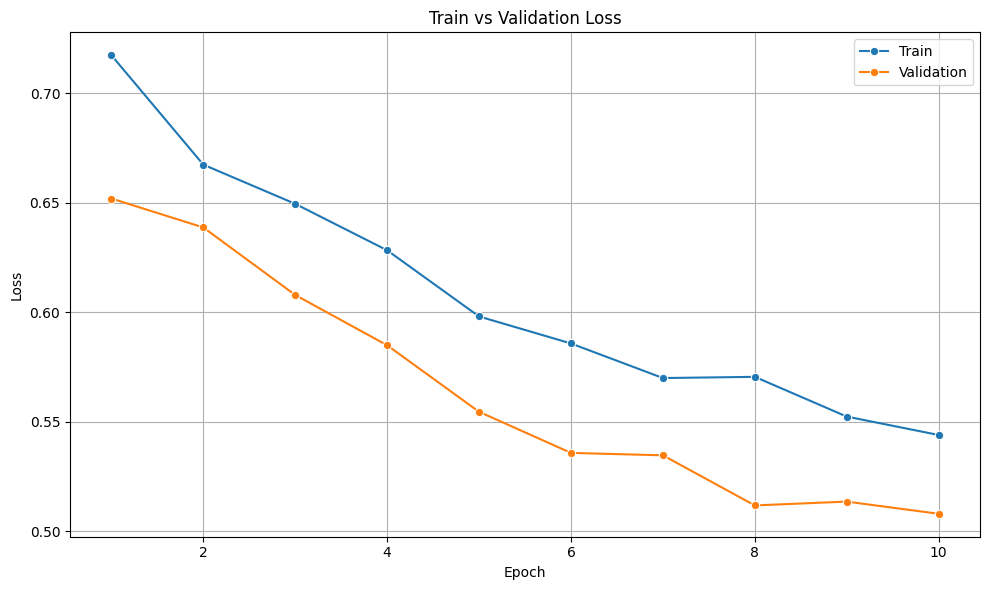

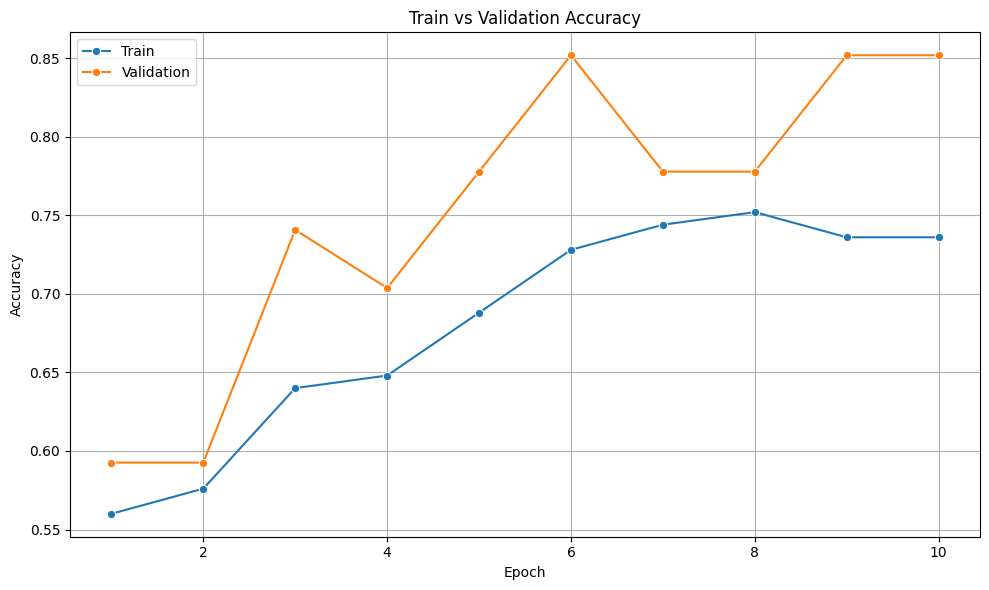

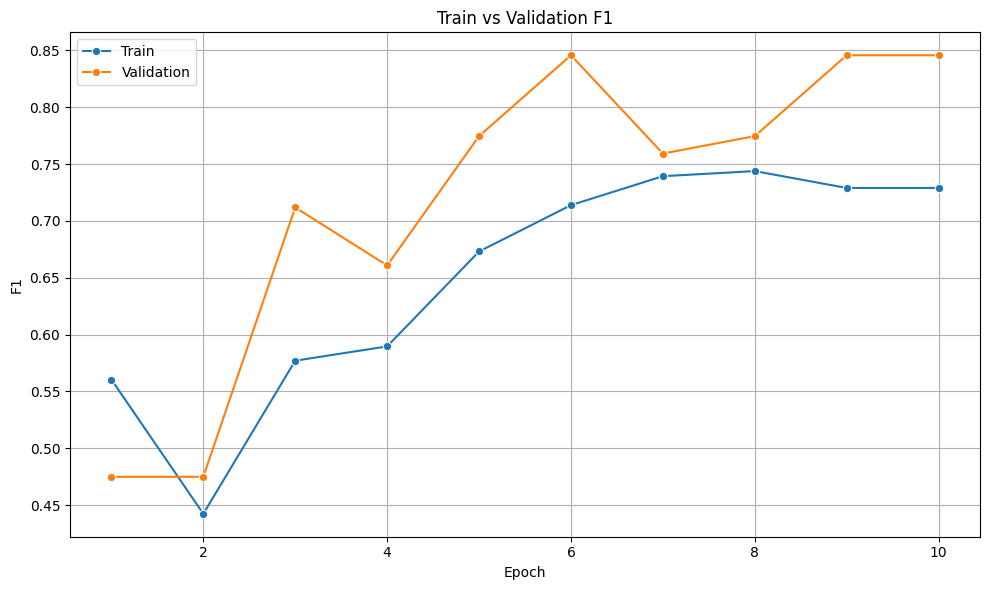

In [38]:
# Plot train and validation curves for different metrics
metrics = ['loss', 'accuracy', 'f1']
run_id = '4y6v9ufy'  
project_name = 'graph-classification-graphs_sc'

for metric in metrics:
    plot_train_val_curves(run_id, metric, project_name=project_name)
